### 1. 회귀 소개
- 유전적 특성을 연구하던 영국의 통계학자 갈톤(Galton)이 수행한 연구에서 유래했다는 것이 일반론임
    - 사람의 키는 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙 존재
    - 이처럼 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법 통칭


- $Y = W_1*X_1 + W_2*X_2 + ... + W_n*X_n$
    - Y : 종속변수(결정 값) , Xn : 독립변수(피처), Wn : 회귀 계수(Regression coefficients)
    
    
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것 ! 

- 회귀 계수의 선형/비선형 여부, 독립변수 개수, 종속변수 개수에 따라 여러 가지 유형으로 나눌 수 있음
- 가장 중요한 것은 **회귀 계수** 
|독립변수 개수|회귀 계수의 결합|
|---|---:|
|1개 : 단일회귀|선형: 선형 회귀|
|여러 개 : 다중 회귀 | 비선형 : 비선형 회귀|

- 지도학습의 두가지 유형
    - 분류 : 예측값이 카테고리와 같은 이산형 클래스 값
    - 회귀 : 예측값이 연속형 숫자 값


- 선형 회귀를 가장 많이 사용함
- 선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
- 규제 방법에 따라 유형을 나눌 수 있음 (규제 : 일반적 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것)


- `일반 선형 회귀` : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
- `릿지(Ridge)` : 선형 회귀에 L2 규제를 추가한 회귀모델 , L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
- `라쏘(Rasso)` : 선형 회귀에 L1 규제를 적용한 회귀모델, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것, 피처 선택 기능으로도 불림
- `엘라스틱넷(ElasticNet)`: L2,L1 규제를 함께 결합한 모델, 주로 피처가 많은 데이터 세트에 적용되며 L1 규제로 피처 개수를 줄이면서 L2 규제로 계수 값의 크기 조정
- `로지스틱 회귀(Logistic Regression)`: 이름은 회귀지만 분류에 사용되는 선형 모델, 매우 강력한 분류 알고리즘으로 이진 분류뿐만 아니라 희소 영역의 분류, 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임

### 2. 단순 선형 회귀를 통한 회귀 이해
- 단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델 : 전체 데이터의 잔차 합이 최소가 되는 모델 & 오류 값의 합이 최소가 될 수 있는 최적의 회귀 계수 찾음


- 오류 값은 음수일 수 있으므로 오류 합 계산 시 절대값을 취해 더하거나(MAE:Mean Absolute Error), 오류 값의 제곱을 구해 더함(RSS : Residual Sum of Squre)
- 일반적으로 RSS방식으로 오류합 구함 $Error^2 = RSS$
- RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항임 (회귀 계수가 중심 변수임!!)

$RSS(w_0,w_1) = 1/N \sum_{i=1}^{N} (y_i-(w_0+w_1*x_i))^2$)   (i : 1~학습 데이터 총 건수 N)
- RSS = 비용(Cost)함수 = 손실 함수(loss function)
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 비용 함수가 반환하는 값(=오류 값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소 오류 값 구함

### 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

- 비용 함수가 최소가 되는 W 파라미터 구하는 방법 중 하나
- 경사 하강법 : 점진적으로 반복적 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터 구하는 방식
    - 데이터 기반으로 알고리즘이 스스로 학습한다는 머신러닝의 개념을 가능하게 만들어준 핵심 기법 중 하나
    - 직관적이고 빠르게 비용 함수가 최소가 되는 W 파라미터 값 구할 수 있음
    - 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감
    - 오류 값이 더 이상 작이지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환


어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까 ? 
- 비용 함수가 포물선 형태의 2차 함수라면 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트함. 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w 반환
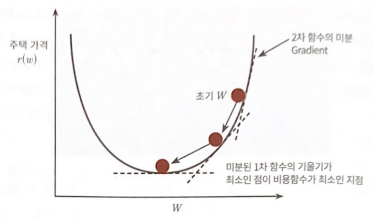

비용 함수를 R(w)로 지칭
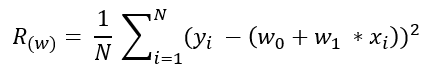
R(w)는 w0, w1으로 이루어진 함수이기 때문에 편미분을 적용
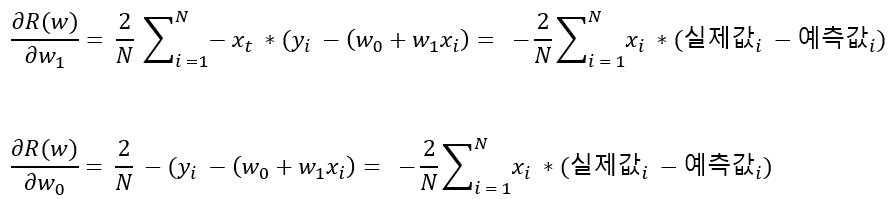
w1, w0 편미분 결괏값을 반복적으로 보정하면서 w1, w0 값을 업데이트하면 비용 함수 R(w)가 최소가 되는 w1, w0의 값을 구할 수 있음

업데이트는 새로운 w1을 이전 w1에서 편미분 결괏값을 마이너스하면서 적용
편미분 값이 너무 클 수도 있기 때문에 보정 계수 η(eta)를 곱하는데 이를 학습률이라고 함
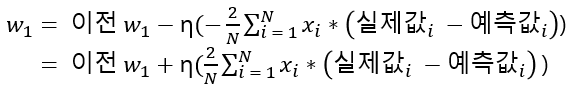


- Step 1 : w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
- Step 2 : image , image로 업데이트 한 뒤 다시 비용 함수 값을 계산합니다.
- Step 3 : 비용 함수의 값이 감소했으면 Step 2를 반복합니다. 더 이상 감소하지 않는 경우, 그 때의 w1, w0를 구하고 반복을 중지합니다.

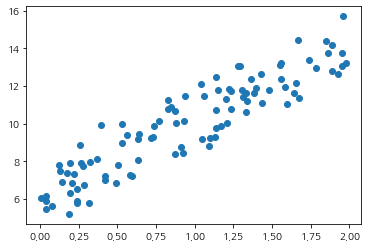

In [10]:
# 경사 하강법 구현
# y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만들고, 경사 하강법을 이용해 회귀 계수 w1, w0를 도출

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# 산점도로 시각화
plt.scatter(X,y)
# 데이터가 직선을 중심으로 무작위로 퍼져있음

비용함수 = $1/N\sum_{i=1}^{N}(실제값_i - 예측값_i)^2$

In [11]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [12]:
# w1과 w0를 업데이트할 w1_update, w0_update 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    # w1_update, w0_update를 각각 w1,w0와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값 차이 계산
    # 예측값 w0+X1*w1 + X2*w2 + ... = np.dot(X,w1.T) + w0
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1_update, w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [13]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [14]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print(get_cost(y,y_pred))
# 실제 선형식과 유사하게 w1가 w2가 도출됨
# 예측 오류 비용은 약 0.9935

w1:4.022 w0:6.162
0.9934784315632568


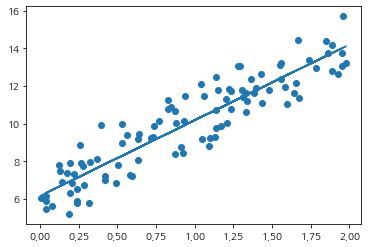

In [15]:
# y_pred 기반으로 회귀선 그리기
plt.scatter(X,y)
plt.plot(X, y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화 하기 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림
- 실전에서는 대부분 확률적 경사 하강법을 이용함


- 확률적 경사 하강법(Stochastic Gradient Descent)
    - 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도 보장
    - 대용량 데이터의 경우 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법 이용해 최적 비용함수 도출

In [16]:
# (미니 배치)확률적 경사 하강법 구현
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [17]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print(get_cost(y,y_pred))\
# 경사 하강법으로 구한 값과 큰 차이가 없으며 예측 오류 비용또한 아주 조금 높으므로 
# 큰 예측 성능상 차이가 없음

w1: 4.028 w0: 6.156
0.9937111256675345


**피처가 여러 개인 경우로 확장**
- 피처가 M개인 경우 회귀 계수도 M+1개로 도출됨
- 예측 행렬 $\hat{Y} = np.dot(X_{mat}, W^T) + w_0$로 계산
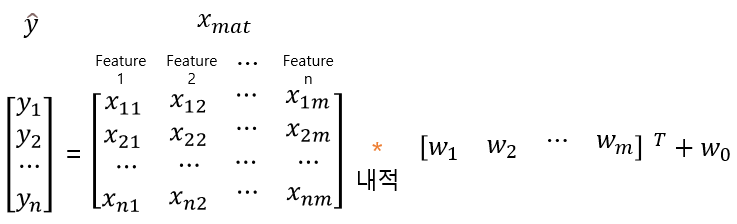
- w0를 W안에 포함시키기 위해 Xmat의 처음 열에 모든 데이터값이 1인 Feat 0 추가
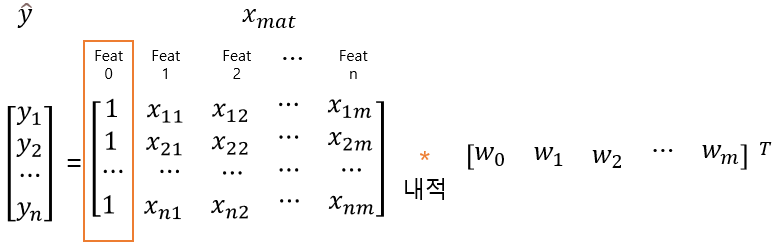

### 4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
-규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스인 LinearRegression을 이용해 보스턴 주택 가격 예측 회귀 구현

#### LinearRegression 클래스 - Ordinary Least Squares
- 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스   
`class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)`

입력 파라미터
- fit_intercept:디폴트는 True, 절편 값 계산할 것인지 여부 지정
- normalize:디폴트는 False, fit_intercept가 False인 경우 무시됨. True이면 회귀 수행 전 입력 데이터 정규화   


속성
- coef_ : fit()메서드 수행 시 회귀 계수가 배열 형태로 저장하는 속성, shape는 (target 값 개수, 피처 개수)
- intercept_ : intercept 값


- OLS 기반 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음
- 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해짐(다중 공선성 문제)
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
- PCA를 통한 차원 축소도 고려해 볼 수 있음

#### 회귀 평가 지표
- 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심임
|평가 지표|설명|수식
|---|:---:|:---:|
|MAE|Mean Absolute Error|$\frac{1}{n}\sum_{i=1}^{n}|Y_i-\hat{Y_i}|$
|MSE|Mean Squared Error|$\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$
|RMSE|Root Mean Squared Error|$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}$
|R^2|분산 기반 예측 성능 평가|예측값 분산/실제값 분산|

#### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방의 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [27]:
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


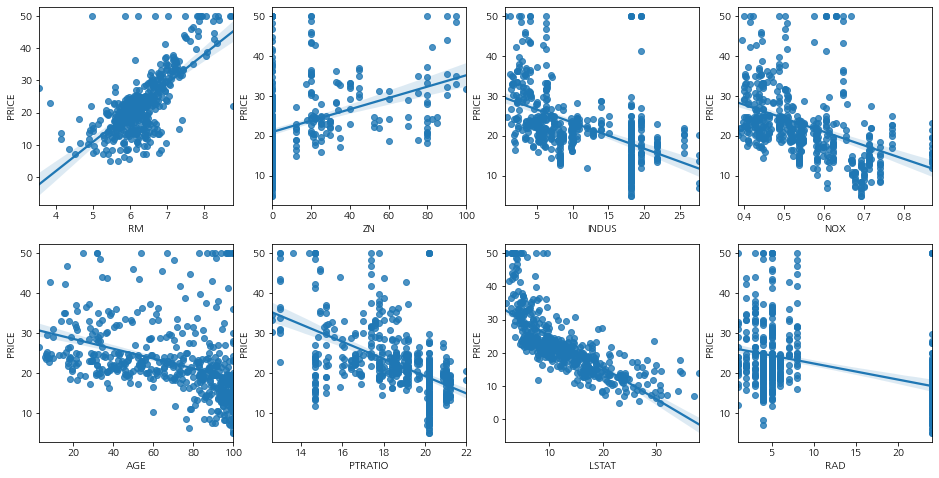

In [30]:
# 각 칼럼이 회귀 결과에 미치는 영향 시각화
fig,axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
# RM(방 개수)과 LSTAT(하위 계층 비율)의 PRICE 영향도가 가장 두드러지게 나타남

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score : 0.757


In [33]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [34]:
# 회귀 계수 정렬을 위해 Series로 생성
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [37]:
# 교차 검증
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 평균 RMSE : 5.829


### 5. 다항 회귀와 과(대)적합/과소적합 이해

#### 다항(Polynomial) 회귀 이해
- 선형 회귀 (회귀 계수가 선형)
- 사이킷런은 다항 회귀를 위한 클래스 명시적으로 제공하지 않음
- 비선형 함수를 선형 모델에 적용시키는 방법으로 구현

In [38]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)
# intercept, x1, x2
# 2차 다항식으로 변환하기 위해 PolynomialFeatures 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)
# intercept, x1, x2, x1^2, x1x2, x2^2

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [39]:
# 3차 다항 계수 피처 값 입력되면 결정 값 반환하는 함수
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y = polynomial_func(X)
print('삼차 단항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 단항식 결정값:
 [  5 125]


In [40]:
# 3차 단항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

# 선형 회귀 모델에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('다항 회귀 계수\n', np.round(model.coef_, 2))
print("다항 회귀 Shape:", model.coef_.shape)
# 회귀 계수가 10개로 늘어남, 원래 다항식 계수와는 차이가 있지만 근사하고 있음

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
다항 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
다항 회귀 Shape: (10,)


In [41]:
# Pipeline 객체를 이용해 한번에 다항회귀 구현
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항 회귀 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어져 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐. 즉 차수가 높을수록 과적합 문제 크게 발생

In [43]:
# 피처 X와 target y가 잡음(Noise)가 포함된 다항식의 코사인 그래프를 가지도록 만든 후
# 이에 기반해 다항 회귀 차수 변환시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교
def true_fun(X):
    return np.cos(1.5 * np.pi*X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다
Degree 1 MSE는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다
Degree 4 MSE는 0.043208749872317556 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다
Degree 15 MSE는 182815433.53618196 입니다.


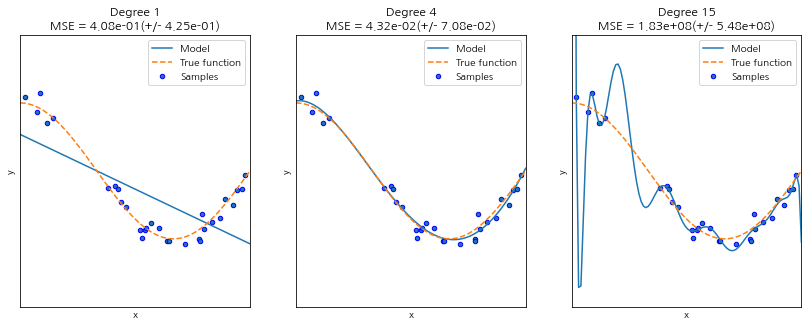

In [47]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]


for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0~1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolors='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 첫번째 예측 곡선은 직선으로 코사인 데이터세트를 예측하기에는 너무 단순함. MSE = 0.41
- 두번째 예측 곡선은 실제 데이터 세트와 유사한 모습임. MSE = 0.04
- 세번째 예측 곡선은 데이터 세트의 변동 잡음값까지 지나치게 반영한 결과 테스트 값의 실제 곡선과는 완전히 다른 예측 곡선 만들어짐. MSE = 182815433 ,회귀 계수도 매우 크게 나옴


- 좋은 예측 모델은 학습 데이터 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델임 ! 

#### 편향-분산 트레이드오프(Bias-Variance Trade off)
- 머신러닝이 극복해야 할 가장 중요한 이슈 중 하나
- 매우 단순화된 모델 → 지나치게 한 방향성으로 치우친 경향이 있음. 고편향(High Bias)성을 가졌다고 표현
- 매우 복잡한 모델 → 지나치게 변동성이 높음. 고분산(High Variance)성을 가졌다고 표현
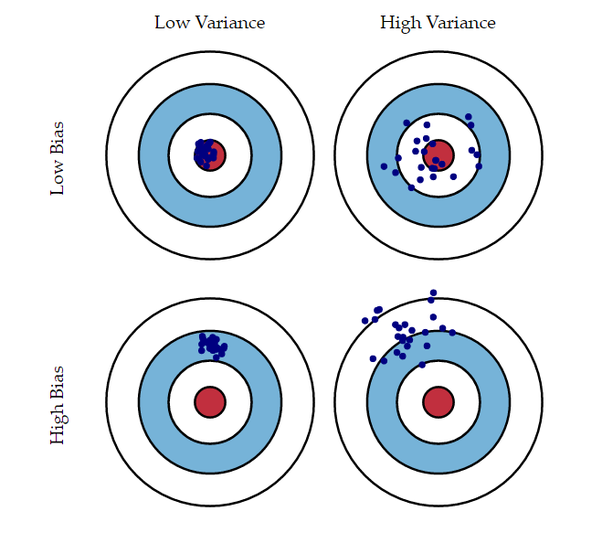

- 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음.
- 과소적합(그래프1) : 편향이 높으면 분산이 낮아짐, 전체 오류 높아짐
- 과적합(그래프3) : 분산이 높으면 편향이 낮아짐, 전체 오류 낮아짐
- '골디락스' : 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 지점

### 6. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

#### 규제 선형 모델의 개요
**좋은 머신러닝 회귀모델의 특징**
- 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야함
- 선형 모델의 비용 함수를 RSS를 최소화하는 것만 고려하면 과적합으로 인해 예측 성능이 저하되기 쉬움
- 비용 함수는 RSS 최소화 방법과 과적합 방지를 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함
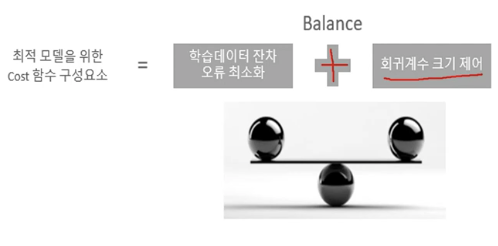


회귀 계수의 크기를 제어해 과적합 개선하기위한 비용함수의 목표 = 아래 식 최소화하는 W 벡터 찾기   
$Min(RSS(W) + alpha*∣∣W∣∣_{2}^2)$ # 설명 추가하기
- alpha : 학습 데이터 적합 정도와 회귀 계수 값 크기 제어 수행 튜닝 파라미터
    - alpha가 0 또는 매우 작은 값일 경우, 비용 함수 식 = Min(RSS(W))
    - alpha가 무한대인 경우, 비용 함수 식은 RSS(W)에 비해 $alpha*||W||_{2}^2$ 값이 매우 커지므로 W값을 0(또는 매우 작게) 만들어야 비용이 최소화 되는 비용 함수 목표 달성 가능
    - alpha값을 크게 하면 회귀 계수 W의 값을 작게 해 과적합 개선
    - alpha값을 작게 하면 회귀 게수 W의 값이 커져도 어느 정도 상쇄 가능하므로 학습 데이터 적합 개선 가능


- **규제** : alpha값으로 페널티 부여해 회귀 계수 값의 크기 감소시켜 과적합 개선하는 방식
    - L2 규제 : $alpha*||W||_{2}^2$와 같이 W의 제곱에 대해 페널티 부여, L2규제 적용한 회귀 = 릿지(Ridge) 회귀 
    - L1 규제 : $alpha*||W||_{1}$와 같이 W의 절대값에 대해 페널티 부여, L1규제 적용한 회귀 = 라쏘(Lasso) 회귀

#### 릿지 회귀
- 주요 생성 파라미터 = alpha , alpha L2 규제 계수

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds 평균 RMSE : {0:.3f}'.format(avg_rmse))
# 규제 없는 선형회귀 RMSE 평균인 5.829보다 더 뛰어난 예측 성능 보여줌

5 folds 개별 Negative MSE scores: [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 개별 RMSE scores: [3.38 4.93 5.31 8.64 5.34]
5 folds 평균 RMSE : 5.518


In [51]:
# alpha값 변화시키면서 RMSE와 회귀 계수 값 변화 확인
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))
# alpha 100일 때의 평균 RMSE가 가장 좋음

alpha 0일 때 5 folds 평균 RMSE : 5.829
alpha 0.1일 때 5 folds 평균 RMSE : 5.788
alpha 1일 때 5 folds 평균 RMSE : 5.653
alpha 10일 때 5 folds 평균 RMSE : 5.518
alpha 100일 때 5 folds 평균 RMSE : 5.330


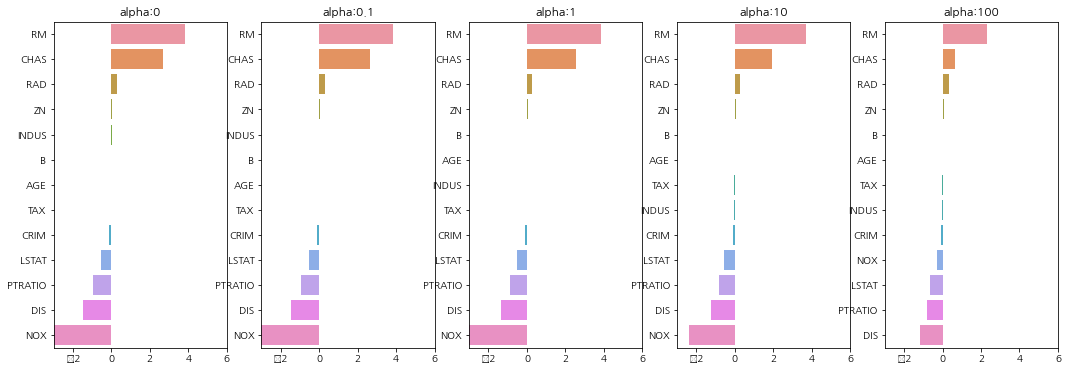

In [52]:
# alpha값에 따른 회귀 계수 값 시각화
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # 피처별 회귀 계수 Series로 변환 후 데이터프레임 칼럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()
# alpha 값이 증가할 수록 회귀계수값은 지속적으로 작아짐
# 특히 NOX 피처의 경우 alpha값 증가에 따라 크게 감소함

In [53]:
# 릿지 회귀 계수 값 확인
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)
# 회귀 계수가 지속적으로 작아지지만 0으로 만들진 않음

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### 라쏘 회귀
- L2 규제 : 회귀 계수 크기 감소
- L1 규제 : 불필요한 회귀 계수를 급격히 감소시켜 0으로 만들어 제거
    - 적절한 피처만 회귀에 포함시키는 피처 선택의 특성 가짐

In [54]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE 출력, 회귀 계수값 데이터프레임으로 반환하는 함수
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('#####', model_name, '#####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                        y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 folds 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_reg_eval

In [55]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_data, y_target_n = y_target)
# alpha가 0.07일때 가장 좋은 평균 RMSE 보여줌
# 릿지 평균 5.5118보다는 약간 떨어지지만 규제 없는 선형 회귀 모델보다는 향상됨

##### Lasso #####
alpha 0.07일 때 5 folds 평균 RMSE : 5.612
alpha 0.1일 때 5 folds 평균 RMSE : 5.615
alpha 0.5일 때 5 folds 평균 RMSE : 5.669
alpha 1일 때 5 folds 평균 RMSE : 5.776
alpha 3일 때 5 folds 평균 RMSE : 6.189


In [56]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)
# alpha값 증가에 따라 일부 계수는 0으로 바뀜
# 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과 얻을 수 있음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### 엘라스틱넷 회귀
L2 규제와 L1 규제를 결합한 회귀
- $RSS(W) + alpha2*||W||_{2}^2 + alpha1*||W||_{1}$ 최소화하는 W 찾기
- 서로 상관관계가 높은 피처들의 경우 이들 중 중요 피처만 셀렉션하고 다른 피처는 모두 회귀 계수를 0으로 만드는 성향이 강함
- alpha값에 따라  회귀 계수의 값이 급격히 변동할 수 있는데, 이를 완화하기 위해 L2규제를 라쏘 회귀에 추가한 것
- 상대적으로 시간이 오래 걸리는 단점이 있음
- 주요 생성 파라미터 : alpha, l1_ratio
    - 엘라스틱넷 규제 = $a*L1 + b*L2$
    - alpha = a+b
    - l1_ratio = a/(a+b)
    - l1_ratio = 0 (a = 0) → L2 규제
    - l1_ratio = 1 (b = 0) → L1 규제

In [57]:
# l1_ratio = 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)
# alpha = 0.5일 때 가장 좋은 예측 성능 보임

##### ElasticNet #####
alpha 0.07일 때 5 folds 평균 RMSE : 5.542
alpha 0.1일 때 5 folds 평균 RMSE : 5.526
alpha 0.5일 때 5 folds 평균 RMSE : 5.467
alpha 1일 때 5 folds 평균 RMSE : 5.597
alpha 3일 때 5 folds 평균 RMSE : 6.068


In [58]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)
# 라쏘보다는 상대적으로 0이 되는 값들이 적음을 알 수 있음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


릿지, 라쏘, 엘라스틱넷 회귀 중 어떤 것이 가장 좋은지는 상황에 따라 다름, 하이퍼 파라미터를 변경해가며 최적의 예측성능 찾아야함


선형 회귀의 경우 최적의 하이퍼 파라미터 찾는 것 못지않게 데이터 분포도의 정규화와 인코딩 방법이 중요함

#### 선형 회귀 모델을 위한 데이터 변환
- 일반적으로 피처와 타깃값 간에 선형 관계가 있다고 가정하고 최적의 선형 함수 찾아내 결과값 예측
- 피처값과 타깃값의 분포가 정규 분포인 형태를 매우 선호
- 특히 타깃값의 경우 왜곡된 형태의 분포일 경우 예측 성능에 부정적 영향 미칠 수 있으므로 모델 적용 전 데이터 스케일링/정규화 작업 수행하는 것이 일반적임
- 하지만 스케일링/정규화 작업을 수행한다고 무조건 예측 성능이 향상되는 것은 아님

**사이킷런으로 피처 데이터 세트에 변환 작업**
1. StandardScaler 클래스로 평균이 0, 분산이 1인 표준 정규분포 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스로 최소값이 0이고 최대값이 1인 값으로 정규화 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성 적용해 변환 (1번 방법으로 예측 성능에 향상이 없을 경우 적용)
3. log 함수 적용 시 보다 정규 분포에 가까운 형태로 값 분포(=로그변환), 선형 회귀에서 가장 많이 사용되는 방법


타깃 값의 경우 일반적으로 로그 변환 적용

In [62]:
# 보스턴 데이터에 변환 적용 후 성능 예측
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data) # 1+log()
    else:
        scaled_data = input_data
    
    if p_degree!=None: # p_degree : 다항식 특성 추가 시 다항식 차수 입력, 2 이상 입력 X
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [63]:
# Ridge 클래스 alpha값 변화시키면서 RMSE값 변화 확인
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard',None), ('Standard',2),
                ('MinMax',None), ('MinMax',2), ('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                   input_data=X_data)
    print('\n##변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


##변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 folds 평균 RMSE : 5.788
alpha 1일 때 5 folds 평균 RMSE : 5.653
alpha 10일 때 5 folds 평균 RMSE : 5.518
alpha 100일 때 5 folds 평균 RMSE : 5.330

##변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 folds 평균 RMSE : 5.826
alpha 1일 때 5 folds 평균 RMSE : 5.803
alpha 10일 때 5 folds 평균 RMSE : 5.637
alpha 100일 때 5 folds 평균 RMSE : 5.421

##변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 folds 평균 RMSE : 8.827
alpha 1일 때 5 folds 평균 RMSE : 6.871
alpha 10일 때 5 folds 평균 RMSE : 5.485
alpha 100일 때 5 folds 평균 RMSE : 4.634

##변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 folds 평균 RMSE : 5.764
alpha 1일 때 5 folds 평균 RMSE : 5.465
alpha 10일 때 5 folds 평균 RMSE : 5.754
alpha 100일 때 5 folds 평균 RMSE : 7.635

##변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 folds 평균 RMSE : 5.298
alpha 1일 때 5 folds 평균 RMSE : 4.323
alpha 10일 때 5 folds 평균 RMSE : 5.185
alpha 100일 때 5 folds 평균 RMSE : 6.538

##변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 folds 평균 RMSE : 4.770
alpha

- 표준 정규 분포, 최소값/최대값 정규화를 해도 성능상 개선은 없음
- 표준 정규 분포로 1차 변환 후 2차 다항식 변환 시 alpha=100에서 4.634로 성능 개선됐으며
- 최소값/최대값 정규화로 1차 변환 후 2차 다항식 변환 시 alpha=1에서 4.323로 성능 개선됨
- 하지만 다항식 변환은 피처 개수가 많을 경우 적용이 힘들며 시간이 많이 소모되어 적용에 한계가 있음
- 로그 변환 시 alpha = 0.1,1,10인 경우 모두 좋은 성능을 보임

### 7. 로지스틱 회귀

선형 회귀 방식에 분류를 적용한 알고리즘
- 학습을 통해 선형 함수의 회귀 최적선을 찾는게 아니라 시그모이드(Sigmoid)함수 최적선을 찾고 이 함수의 반환 값을 확률로 간주해 확률에 따라 분류 결정
- 많은 자연, 사회 현상에서 특정 변수의 확률값은 시그모이드 함수와 같이 S자 커브 형태를 가짐
- 시그모이드 함수 정의 : $y = \frac{1}{1+e^-x}$
- y값은 항상 0부터 1사이 값 반환 , x값이 커지면 1에 근사 , x값이 작이지면 0에 근사 , x=0일 때는 0.5

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [68]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score
# solver = 'lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy : {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

accuracy : 0.977, roc_auc:0.972


In [70]:
# solver 별 성능 평가
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)

    print('solver:{0}, accuracy : {1:.3f}, roc_auc:{2:.3f}'.format(solver,accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))
# liblinear, sag, saga일 경우 정확도와 ROC-AUC가 약간 더 높지만 데이터 세트가 워낙 작아 의미있는 결과는 아님
# solver별 차이는 크지 않으며 전반적으로 liblinear가 성능이 약간 높은 경향이 있음

solver:lbfgs, accuracy : 0.977, roc_auc:0.972
solver:liblinear, accuracy : 0.982, roc_auc:0.979
solver:newton-cg, accuracy : 0.977, roc_auc:0.972
solver:sag, accuracy : 0.982, roc_auc:0.979
solver:saga, accuracy : 0.982, roc_auc:0.979


**LogisticRegression 클래스의 주요 하이퍼 파라미터**
- penalty : 규제의 유형 설정, l1/l2
- C : 규제의 강도 조절 , $C=\frac{1}{alpha}$ , C값이 작을수록 규제 강도가 큼


- L1,L2 규제는 solver 설정에 영향 받음
    - liblinear, saga : L1, L2 규제 모두 가능
    - lbfgs, newton-cg, sag : L2규제만 가능

In [ ]:
# GridSearchCV로 위스콘신 데이터에서 solver, penalty, C 최적화
from sklearn.model_selection import GridSearchCV

params = {'solver':['liblinear','lbfgs'],
         'penalty':['l2','l2'],
         'C':[0.01, 0.1, 1, 3, 5, 10]}
lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scorin)